# Diabetes Prediction Challenge - Exploratory Data Analysis
## Kaggle Playground Series S5E12

This notebook examines the diabetes prediction dataset to understand the data and develop a modeling strategy.

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

import warnings
warnings.filterwarnings('ignore')

## 2. Load and Inspect the Dataset

In [2]:
# Load the datasets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

Training set shape: (700000, 26)
Test set shape: (300000, 25)
Sample submission shape: (300000, 2)


In [3]:
# Preview the training data
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [4]:
# Data types and non-null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [5]:
# Statistical summary of numerical features
train.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check for missing values
missing = train.isnull().sum()
missing_pct = (missing / len(train) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_df[missing_df['Missing Count'] > 0]

,Missing Count,Missing %


In [7]:
# Identify categorical and numerical columns
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('id')  # Remove id from features
if 'diagnosed_diabetes' in numerical_cols:
    numerical_cols.remove('diagnosed_diabetes')  # Remove target

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

Categorical columns (6): ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']

Numerical columns (18): ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']


## 3. Target Variable Analysis

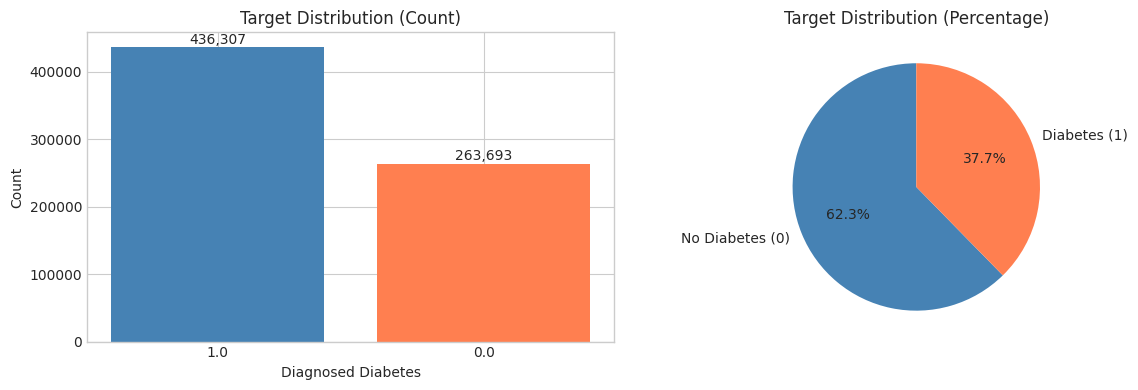

Class imbalance ratio: 0.60:1


In [8]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
target_counts = train['diagnosed_diabetes'].value_counts()
axes[0].bar(target_counts.index.astype(str), target_counts.values, color=['steelblue', 'coral'])
axes[0].set_xlabel('Diagnosed Diabetes')
axes[0].set_ylabel('Count')
axes[0].set_title('Target Distribution (Count)')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center')

# Percentage
target_pct = train['diagnosed_diabetes'].value_counts(normalize=True) * 100
axes[1].pie(target_pct.values, labels=['No Diabetes (0)', 'Diabetes (1)'], 
            autopct='%1.1f%%', colors=['steelblue', 'coral'], startangle=90)
axes[1].set_title('Target Distribution (Percentage)')

plt.tight_layout()
plt.show()

print(f"Class imbalance ratio: {target_counts[0]/target_counts[1]:.2f}:1")

## 4. Exploratory Data Analysis (EDA)

### 4.1 Numerical Features Distribution

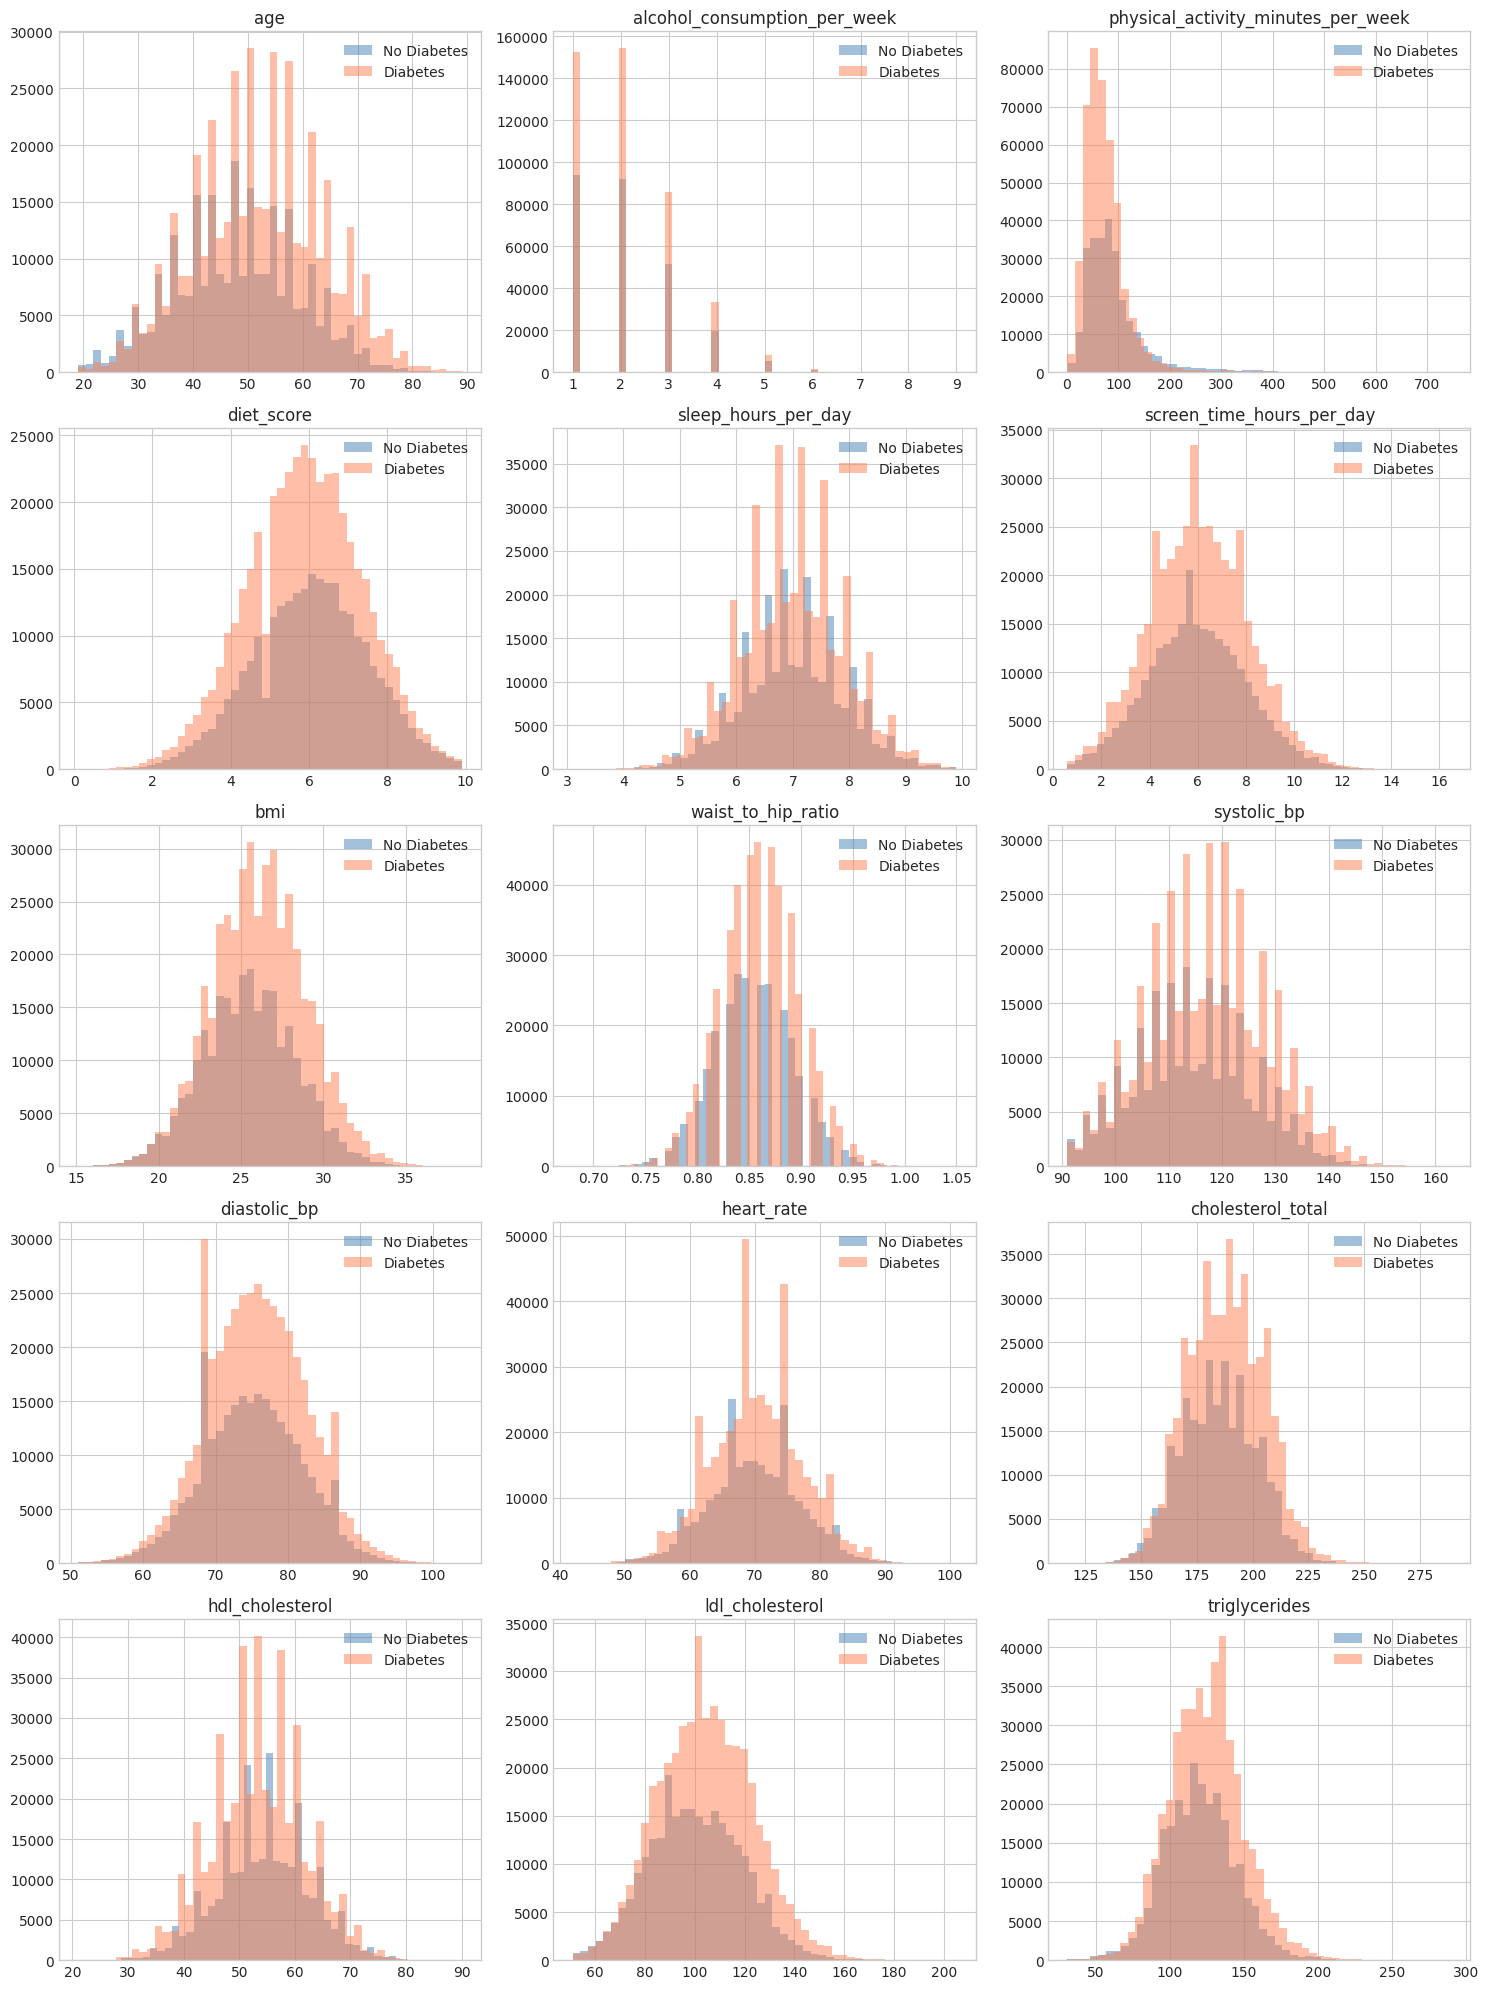

In [10]:
# Distribution of numerical features (excluding binary)
plot_cols = [c for c in numerical_cols if c not in ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']]
n_cols = 3
n_rows = (len(plot_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(plot_cols):
    ax = axes[idx]
    
    # Plot histogram for each class
    train[train['diagnosed_diabetes'] == 0][col].hist(ax=ax, alpha=0.5, label='No Diabetes', bins=50, color='steelblue')
    train[train['diagnosed_diabetes'] == 1][col].hist(ax=ax, alpha=0.5, label='Diabetes', bins=50, color='coral')
    
    ax.set_title(col)
    ax.legend()

# Hide empty subplots
for idx in range(len(plot_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

### 4.2 Categorical Features Distribution

In [11]:
# Categorical features value counts
for col in categorical_cols:
    print(f"\n{col}:")
    print(train[col].value_counts())


gender:
gender
Female    363237
Male      333085
Other       3678
Name: count, dtype: int64

ethnicity:
ethnicity
White       386153
Hispanic    129984
Black       106301
Asian        60120
Other        17442
Name: count, dtype: int64

education_level:
education_level
Highschool      344145
Graduate        261268
Postgraduate     79642
No formal        14945
Name: count, dtype: int64

income_level:
income_level
Middle          290557
Lower-Middle    178570
Upper-Middle    127836
Low              85803
High             17234
Name: count, dtype: int64

smoking_status:
smoking_status
Never      494448
Current    103363
Former     102189
Name: count, dtype: int64

employment_status:
employment_status
Employed      516170
Retired       115735
Unemployed     49787
Student        18308
Name: count, dtype: int64


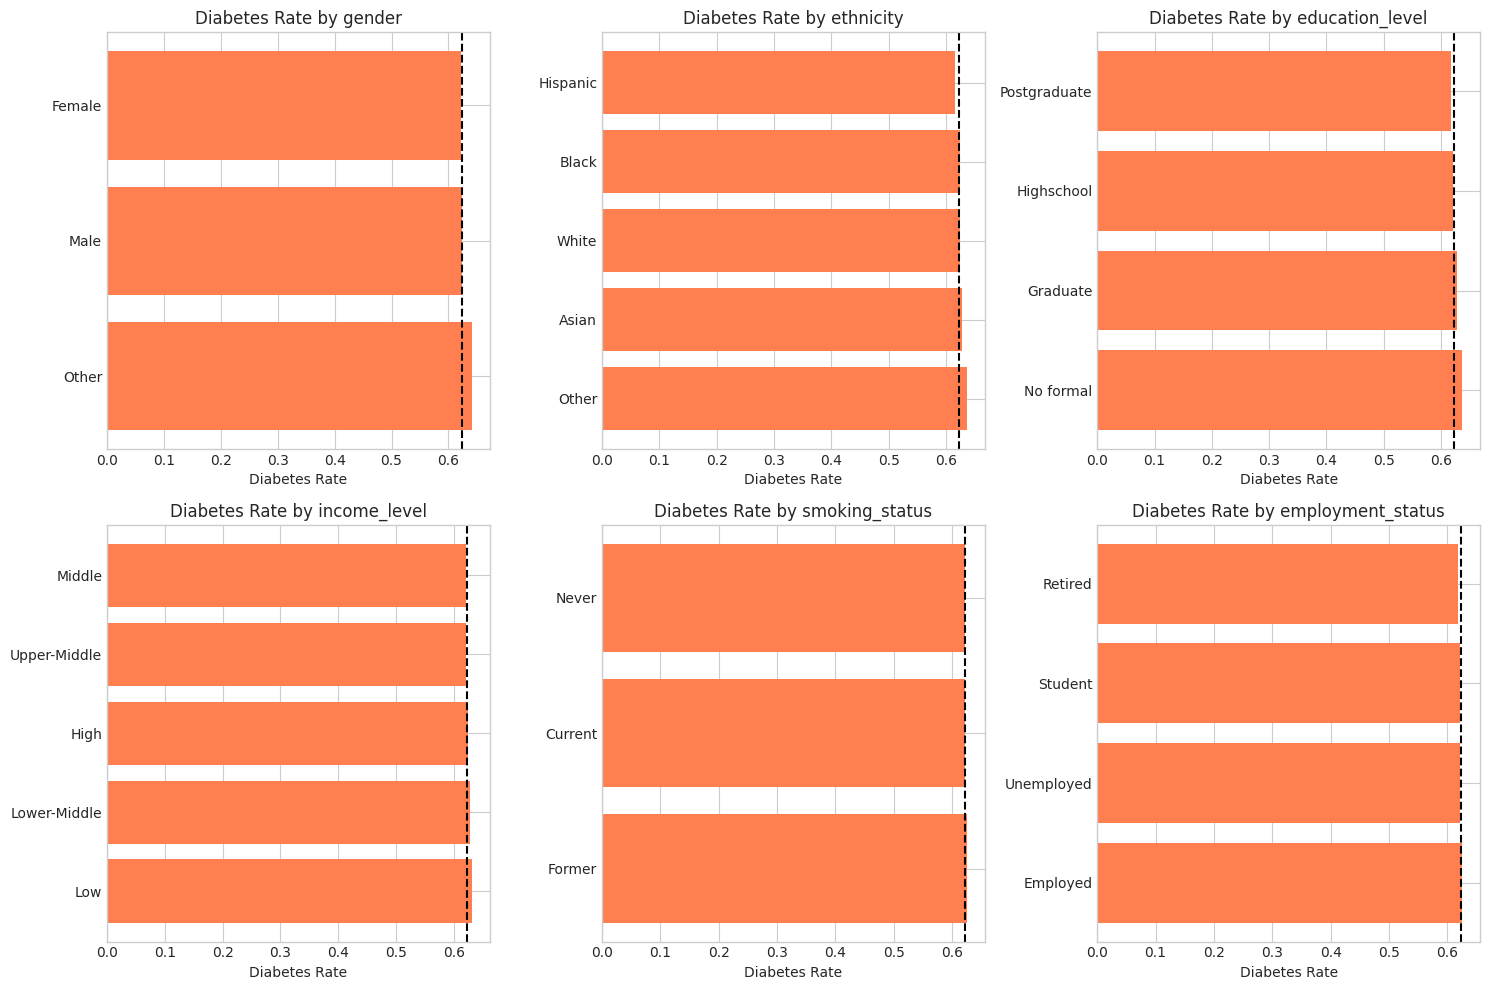

In [12]:
# Categorical features with diabetes rate
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    
    # Calculate diabetes rate per category
    diabetes_rate = train.groupby(col)['diagnosed_diabetes'].mean().sort_values(ascending=False)
    
    bars = ax.barh(diabetes_rate.index, diabetes_rate.values, color='coral')
    ax.set_xlabel('Diabetes Rate')
    ax.set_title(f'Diabetes Rate by {col}')
    ax.axvline(x=train['diagnosed_diabetes'].mean(), color='black', linestyle='--', label='Overall Rate')
    
plt.tight_layout()
plt.show()

### 4.3 Binary Features Analysis

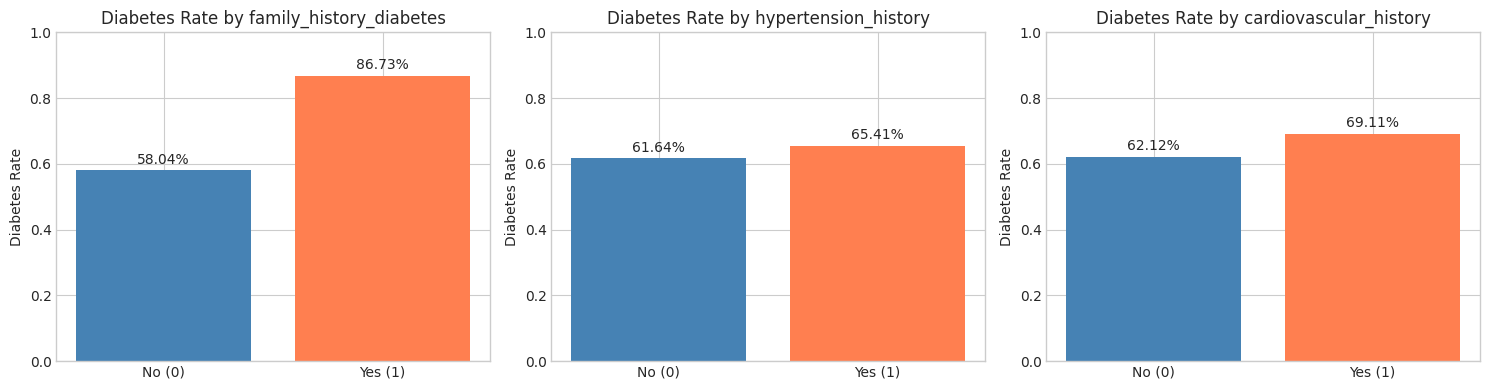

In [13]:
# Binary features (medical history)
binary_cols = ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(binary_cols):
    ax = axes[idx]
    
    # Diabetes rate by binary feature
    diabetes_rate = train.groupby(col)['diagnosed_diabetes'].mean()
    
    bars = ax.bar(['No (0)', 'Yes (1)'], diabetes_rate.values, color=['steelblue', 'coral'])
    ax.set_ylabel('Diabetes Rate')
    ax.set_title(f'Diabetes Rate by {col}')
    ax.set_ylim(0, 1)
    
    for bar, val in zip(bars, diabetes_rate.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                f'{val:.2%}', ha='center')

plt.tight_layout()
plt.show()

## 5. Correlation Analysis

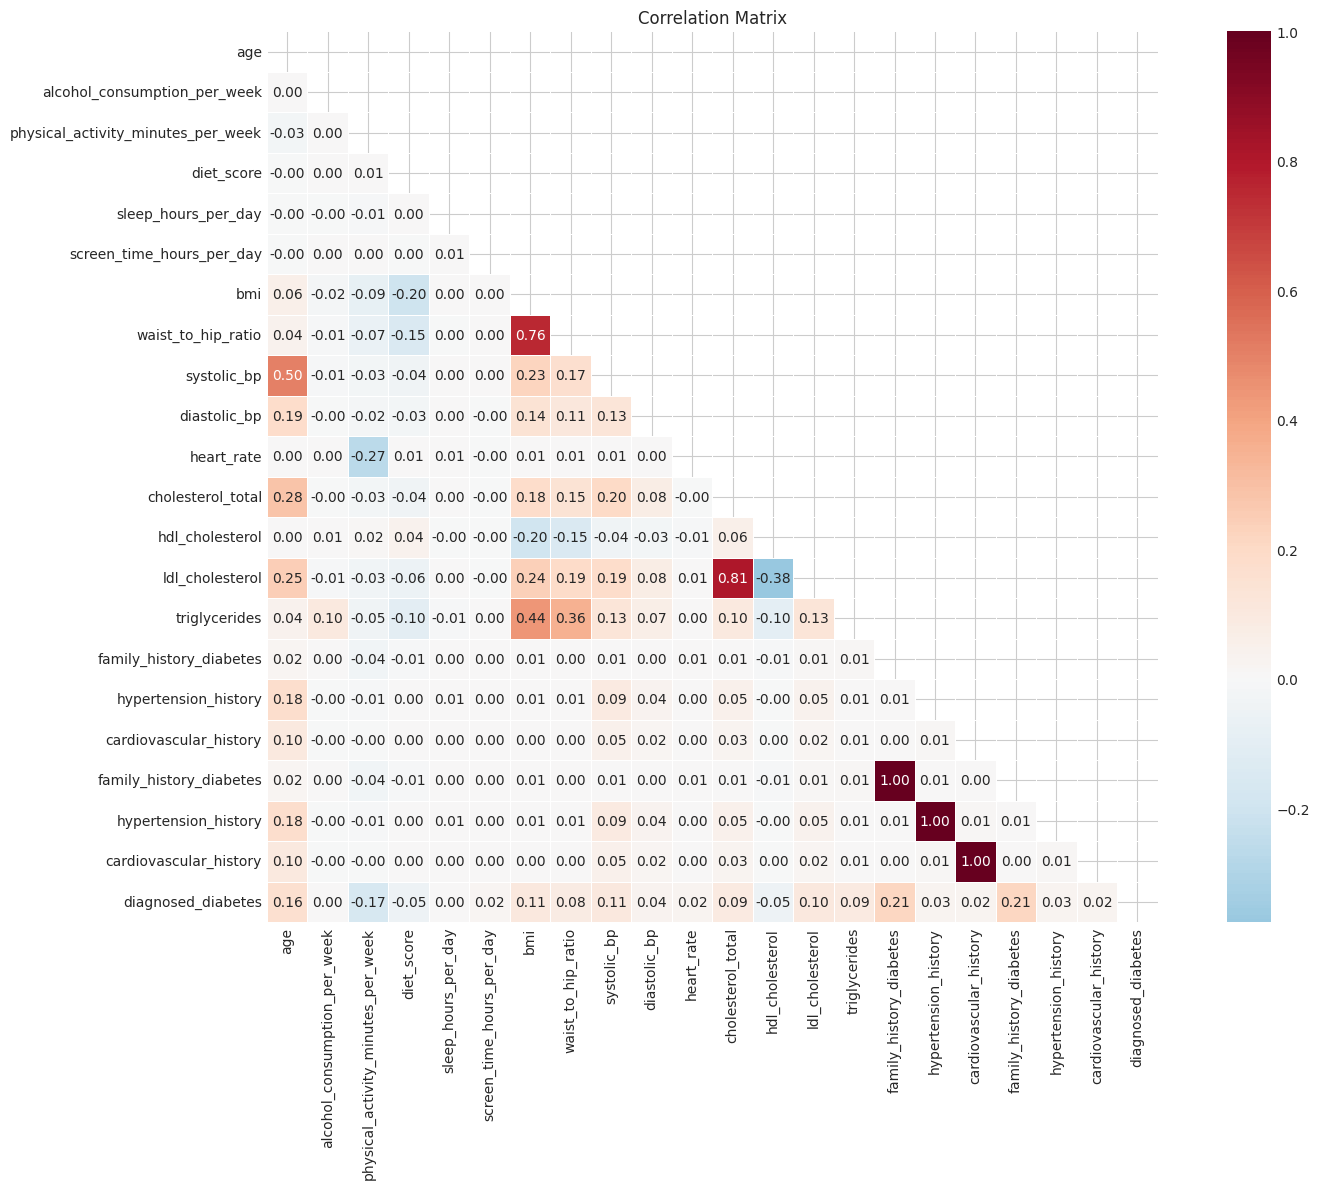

In [14]:
# Correlation matrix for numerical features + target
corr_cols = numerical_cols + binary_cols + ['diagnosed_diabetes']
corr_matrix = train[corr_cols].corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

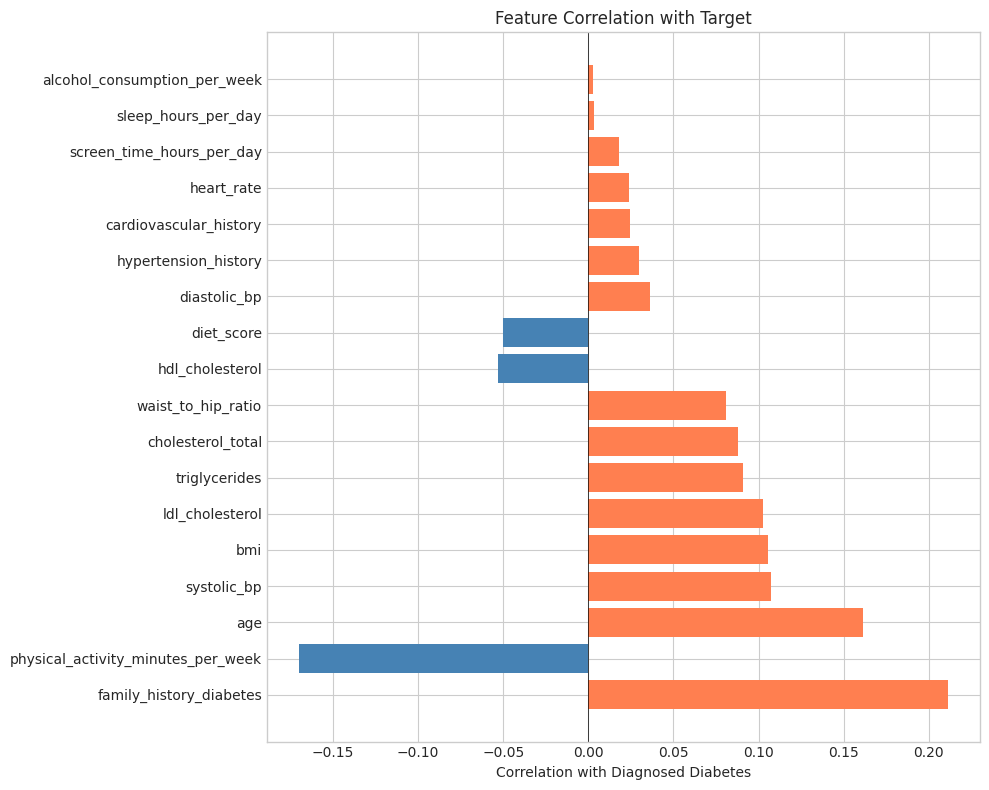


Top correlations with target:
family_history_diabetes               0.211064
family_history_diabetes               0.211064
physical_activity_minutes_per_week   -0.169789
age                                   0.161162
systolic_bp                           0.107132
bmi                                   0.105580
ldl_cholesterol                       0.102771
triglycerides                         0.090635
cholesterol_total                     0.088112
waist_to_hip_ratio                    0.081050
hdl_cholesterol                      -0.053231
diet_score                           -0.050119
diastolic_bp                          0.036271
hypertension_history                  0.029979
hypertension_history                  0.029979
cardiovascular_history                0.024746
cardiovascular_history                0.024746
heart_rate                            0.023865
screen_time_hours_per_day             0.018213
sleep_hours_per_day                   0.003509
alcohol_consumption_per_week 

In [15]:
# Correlation with target variable
target_corr = train[corr_cols].corr()['diagnosed_diabetes'].drop('diagnosed_diabetes').sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 8))
colors = ['coral' if x > 0 else 'steelblue' for x in target_corr.values]
plt.barh(target_corr.index, target_corr.values, color=colors)
plt.xlabel('Correlation with Diagnosed Diabetes')
plt.title('Feature Correlation with Target')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\nTop correlations with target:")
print(target_corr)

## 6. Data Quality Check

In [16]:
# Check for duplicates
print(f"Duplicate rows in train: {train.duplicated().sum()}")
print(f"Duplicate rows in test: {test.duplicated().sum()}")

# Check if test IDs continue from train
print(f"\nTrain ID range: {train['id'].min()} - {train['id'].max()}")
print(f"Test ID range: {test['id'].min()} - {test['id'].max()}")

Duplicate rows in train: 0
Duplicate rows in test: 0

Train ID range: 0 - 699999
Test ID range: 700000 - 999999


In [17]:
# Compare train and test distributions
print("Comparing train vs test distributions:\n")
for col in categorical_cols:
    print(f"{col}:")
    train_vals = set(train[col].unique())
    test_vals = set(test[col].unique())
    print(f"  Train unique values: {train_vals}")
    print(f"  Test unique values: {test_vals}")
    print(f"  In train but not test: {train_vals - test_vals}")
    print(f"  In test but not train: {test_vals - train_vals}")
    print()

Comparing train vs test distributions:

gender:
  Train unique values: {'Female', 'Male', 'Other'}
  Test unique values: {'Female', 'Male', 'Other'}
  In train but not test: set()
  In test but not train: set()

ethnicity:
  Train unique values: {'White', 'Hispanic', 'Black', 'Other', 'Asian'}
  Test unique values: {'Hispanic', 'White', 'Black', 'Other', 'Asian'}
  In train but not test: set()
  In test but not train: set()

education_level:
  Train unique values: {'Highschool', 'No formal', 'Postgraduate', 'Graduate'}
  Test unique values: {'Highschool', 'No formal', 'Postgraduate', 'Graduate'}
  In train but not test: set()
  In test but not train: set()

income_level:
  Train unique values: {'Middle', 'High', 'Low', 'Upper-Middle', 'Lower-Middle'}
  Test unique values: {'Middle', 'High', 'Low', 'Upper-Middle', 'Lower-Middle'}
  In train but not test: set()
  In test but not train: set()

smoking_status:
  Train unique values: {'Former', 'Current', 'Never'}
  Test unique values: {'Fo

## 7. Key Insights Summary

In [18]:
# Summary statistics
print("=" * 60)
print("KEY INSIGHTS SUMMARY")
print("=" * 60)

print(f"\n📊 DATASET SIZE:")
print(f"   - Training samples: {len(train):,}")
print(f"   - Test samples: {len(test):,}")
print(f"   - Total features: {len(train.columns) - 2} (excluding id and target)")

print(f"\n🎯 TARGET VARIABLE:")
diabetes_rate = train['diagnosed_diabetes'].mean()
print(f"   - Diabetes rate: {diabetes_rate:.2%}")
print(f"   - Class balance: {'Imbalanced' if diabetes_rate < 0.4 or diabetes_rate > 0.6 else 'Relatively balanced'}")

print(f"\n📋 FEATURES:")
print(f"   - Numerical: {len(numerical_cols)}")
print(f"   - Categorical: {len(categorical_cols)}")
print(f"   - Binary (medical history): {len(binary_cols)}")

print(f"\n🔍 DATA QUALITY:")
print(f"   - Missing values: {train.isnull().sum().sum()}")
print(f"   - Duplicates: {train.duplicated().sum()}")

print(f"\n📈 TOP CORRELATED FEATURES WITH TARGET:")
for feat, corr in target_corr.head(5).items():
    print(f"   - {feat}: {corr:.3f}")

KEY INSIGHTS SUMMARY

📊 DATASET SIZE:
   - Training samples: 700,000
   - Test samples: 300,000
   - Total features: 24 (excluding id and target)

🎯 TARGET VARIABLE:
   - Diabetes rate: 62.33%
   - Class balance: Imbalanced

📋 FEATURES:
   - Numerical: 18
   - Categorical: 6
   - Binary (medical history): 3

🔍 DATA QUALITY:
   - Missing values: 0
   - Duplicates: 0

📈 TOP CORRELATED FEATURES WITH TARGET:
   - family_history_diabetes: 0.211
   - family_history_diabetes: 0.211
   - physical_activity_minutes_per_week: -0.170
   - age: 0.161
   - systolic_bp: 0.107
   - Duplicates: 0

📈 TOP CORRELATED FEATURES WITH TARGET:
   - family_history_diabetes: 0.211
   - family_history_diabetes: 0.211
   - physical_activity_minutes_per_week: -0.170
   - age: 0.161
   - systolic_bp: 0.107


## 8. Modeling Strategy & Plan

Based on the EDA findings, here's the recommended approach:

In [ ]:
modeling_plan = """
╔══════════════════════════════════════════════════════════════════════════════╗
║                         MODELING STRATEGY & PLAN                              ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                               ║
║  1. DATA PREPROCESSING                                                        ║
║     ├─ Handle missing values (if any)                                         ║
║     ├─ Encode categorical variables (Label/One-Hot/Target encoding)           ║
║     ├─ Scale numerical features (StandardScaler/RobustScaler)                 ║
║     └─ Feature engineering:                                                   ║
║        • BMI categories (underweight, normal, overweight, obese)              ║
║        • Age groups                                                           ║
║        • Blood pressure categories                                            ║
║        • Cholesterol ratios (LDL/HDL, Total/HDL)                              ║
║        • Risk score combining medical history features                        ║
║                                                                               ║
║  2. CROSS-VALIDATION STRATEGY                                                 ║
║     ├─ StratifiedKFold (5-fold) to preserve target distribution               ║
║     └─ Consider GroupKFold if there's potential data leakage                  ║
║                                                                               ║
║  3. EVALUATION METRIC                                                         ║
║     ├─ Primary: AUC-ROC (typical for Kaggle binary classification)            ║
║     ├─ Secondary: F1-Score, Precision, Recall                                 ║
║     └─ Check competition page for specific metric                             ║
║                                                                               ║
║  4. MODELS TO TRY                                                             ║
║     ├─ Baseline: Logistic Regression                                          ║
║     ├─ Tree-based:                                                            ║
║     │  • LightGBM (fast, handles categoricals natively)                       ║
║     │  • XGBoost (robust, good performance)                                   ║
║     │  • CatBoost (handles categoricals well)                                 ║
║     ├─ Neural Networks (TabNet, simple MLP)                                   ║
║     └─ Ensemble: Weighted average of best models                              ║
║                                                                               ║
║  5. HYPERPARAMETER TUNING                                                     ║
║     ├─ Optuna for Bayesian optimization                                       ║
║     └─ Key params: learning_rate, max_depth, num_leaves, regularization       ║
║                                                                               ║
║  6. ENSEMBLE STRATEGY                                                         ║
║     ├─ Blend predictions from multiple models                                 ║
║     ├─ Stacking with meta-learner                                             ║
║     └─ Weighted average based on CV scores                                    ║
║                                                                               ║
║  7. RECOMMENDED APPROACH (Prioritized)                                        ║
║     Step 1: Quick baseline with LightGBM (minimal preprocessing)              ║
║     Step 2: Feature engineering + LightGBM/XGBoost                            ║
║     Step 3: Hyperparameter tuning with Optuna                                 ║
║     Step 4: Train multiple models (LGBM, XGB, CatBoost)                       ║
║     Step 5: Create ensemble of best models                                    ║
║     Step 6: Submit and iterate                                                ║
║                                                                               ║
╚══════════════════════════════════════════════════════════════════════════════╝
"""
print(modeling_plan)


╔══════════════════════════════════════════════════════════════════════════════╗
║                         MODELING STRATEGY & PLAN                              ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                               ║
║  1. DATA PREPROCESSING                                                        ║
║     ├─ Handle missing values (if any)                                         ║
║     ├─ Encode categorical variables (Label/One-Hot/Target encoding)           ║
║     ├─ Scale numerical features (StandardScaler/RobustScaler)                 ║
║     └─ Feature engineering:                                                   ║
║        • BMI categories (underweight, normal, overweight, obese)              ║
║        • Age groups                                                           ║
║        • Blood pressure categories                                            ║
║        • Choles

: 